<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook is created for the modelling of the full data using [Scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

![title](images/scikit_learn_map.png)

<h2><font color=slateblue> Preparing the tools </font></h2>

In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, ElasticNet, BayesianRidge, LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Save a model
import pickle

<h2><font color=slateblue>Read CSV file </font></h2>

In [2]:
# read prepared dataset csv file
df = pd.read_csv("data/df_prepared_full_data.csv")
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
9627,5642,10633.0,8.116954,242.498357,5.228662,22.051855,635.021184,2021,10,19,1,292
4434,5631,8700.0,14.202950,225.624177,2.885296,166.499413,593.492863,2021,5,15,5,135
7617,5657,19845.0,8.619268,209.563072,3.622298,74.004952,602.139474,2021,8,19,3,231
3730,5645,2962.0,3.491753,48.067562,3.536806,241.906814,640.432709,2021,4,24,5,114
1134,5625,5948.0,10.204138,256.761792,3.579771,54.880698,373.150277,2021,2,4,3,35


<h2><font color=slateblue>Modelling using daily data</font></h2>

<h4><font color=mediumvioletred>Get X and y</font></h4>

In [3]:
X = df.drop("pm2.5", axis=1)
y = df["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [4]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
5880,5611,16426.0,210.552521,1.576502,170.287323,374.055425,2021,6,28,0,179
9258,5622,10284.0,65.861809,2.246702,120.903642,261.327832,2021,10,8,4,281
6501,5658,3225.0,90.621340,3.346490,311.078118,555.838895,2021,7,17,5,198
2789,5617,5266.0,248.929563,5.168404,120.601667,903.158837,2021,3,26,4,85
1410,5631,6818.0,15.746153,4.543299,104.400852,434.259297,2021,2,12,4,43


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [5]:
y.sample(5)

821     24.685602
5576     7.530767
8336     6.642014
6216     7.282204
9150     3.831545
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [6]:
df.shape

(10626, 12)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [7]:
df_train = df[df.month < 8]
df_test = df[df.month >= 8]

len(df_train), len(df_test)

(6996, 3630)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [8]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6996, 11), (6996,), (3630, 11), (3630,))

In [9]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Create a method to evaluate model with Mean Absolute Error (MAE)</font></h4>

MAE is the average of the absolute differences between predictions and actual values.
It gives an idea of how wrong the model's predictions are.

In [10]:
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Testing MAE": mean_absolute_error(y_test, test_preds)
    }
    
    return scores

<h4><font color=mediumvioletred>Create a method to get a dataframe containing actual values, predictions and the differences between the two</font></h4>

In [11]:
def get_scores_dataframe(model):
    test_preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, test_preds)

    df = pd.DataFrame(data={"actual values": y_test,
                           "predicted values": test_preds})

    df["differences"] = np.abs(df["predicted values"] - df["actual values"])

    return df

<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [12]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [13]:
# score model
show_scores(rf_model)

{'Training MAE': 0.04171778584017379, 'Testing MAE': 5.808087347686456}

In [14]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10554,52.221626,8.736306,43.485320
10552,52.221626,8.736306,43.485320
10528,52.191574,8.701670,43.489904
10539,52.191574,8.695751,43.495824
10559,52.191574,8.695310,43.496264
10550,52.191574,8.695310,43.496264
10549,52.513554,8.707596,43.805958
10553,53.134212,8.743520,44.390692
10540,53.134212,8.728602,44.405611
10558,53.134212,8.709376,44.424836


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [15]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [16]:
# score model
show_scores(sgd_model)

{'Training MAE': 5.636144156470307, 'Testing MAE': 6.820826154766663}

In [17]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10558,53.134212,7,46.134212
10548,49.394966,3,46.394966
10542,50.327637,3,47.327637
10536,50.327637,3,47.327637
10527,51.049526,3,48.049526
10550,52.191574,3,49.191574
10539,52.191574,3,49.191574
10559,52.191574,3,49.191574
10528,52.191574,3,49.191574
10553,53.134212,3,50.134212


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [18]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [19]:
# score model
show_scores(br_model)

{'Training MAE': 4.493719072780842, 'Testing MAE': 12.533384729521654}

In [20]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10538,52.221626,-2.137597,54.359223
10556,52.221626,-2.141879,54.363505
10552,52.221626,-2.145186,54.366812
10532,52.221626,-2.161142,54.382768
10534,52.221626,-2.162837,54.384464
10547,52.221626,-2.182549,54.404175
10549,52.513554,-2.066935,54.580489
10553,53.134212,-2.028515,55.162728
10558,53.134212,-2.068599,55.202812
10540,53.134212,-2.073668,55.207880


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [21]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [22]:
# score model
show_scores(lasso_model)

{'Training MAE': 4.718627988121286, 'Testing MAE': 9.193399983957317}

In [23]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10556,52.221626,3.399523,48.822104
10538,52.221626,3.392149,48.829477
10534,52.221626,3.390166,48.831460
10532,52.221626,3.388391,48.833236
10552,52.221626,3.387409,48.834217
10547,52.221626,3.378918,48.842708
10549,52.513554,3.456812,49.056741
10540,53.134212,3.488185,49.646028
10558,53.134212,3.459423,49.674790
10553,53.134212,3.457639,49.676573


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [24]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [25]:
# score model
show_scores(en_model)

{'Training MAE': 4.711480312254824, 'Testing MAE': 9.081408868592785}

In [26]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10556,52.221626,3.069623,49.152003
10554,52.221626,3.066803,49.154823
10547,52.221626,3.064831,49.156795
10532,52.221626,3.064592,49.157034
10538,52.221626,3.055465,49.166161
10552,52.221626,3.052110,49.169516
10549,52.513554,3.092049,49.421505
10540,53.134212,3.143768,49.990444
10558,53.134212,3.100039,50.034173
10553,53.134212,3.066014,50.068198


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [27]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [28]:
# score model
show_scores(svr_model)

{'Training MAE': 5.333511269470986, 'Testing MAE': 5.7497847250923115}

In [29]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10554,52.221626,11.453576,40.768050
10552,52.221626,11.412368,40.809258
10556,52.221626,10.988021,41.233605
10385,49.336040,8.068439,41.267601
10532,52.221626,10.443014,41.778612
10534,52.221626,10.269881,41.951745
10549,52.513554,10.431605,42.081948
10547,52.221626,9.809105,42.412522
10558,53.134212,10.181038,42.953174
10540,53.134212,8.129580,45.004633


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [30]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [31]:
# score model
show_scores(gbr_model)

{'Training MAE': 3.702118080860074, 'Testing MAE': 5.003318273816123}

In [32]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10552,52.221626,16.393411,35.828215
10538,52.221626,16.393411,35.828215
10547,52.221626,16.393411,35.828215
10554,52.221626,16.393411,35.828215
10534,52.221626,16.393411,35.828215
10549,52.513554,16.393411,36.120142
10427,45.380806,9.213524,36.167282
10558,53.134212,16.393411,36.740801
10553,53.134212,16.393411,36.740801
10540,53.134212,16.393411,36.740801


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* GradientBoostingRegressor: 5.003318273816123
* SVR: 5.7497847250923115
* RandomForestRegressor: 5.808087347686456

**After using more data (from 2021-01-01 to 2021-11-18), the models' scores improved a bit.
However, the maximum value is still too high, this is because there are unhandled outliers.**

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

In [33]:
gbr_model.feature_importances_

array([0.        , 0.        , 0.04223137, 0.00725066, 0.05456352,
       0.60346652, 0.        , 0.01597499, 0.03872019, 0.01141425,
       0.2263785 ])

In [34]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

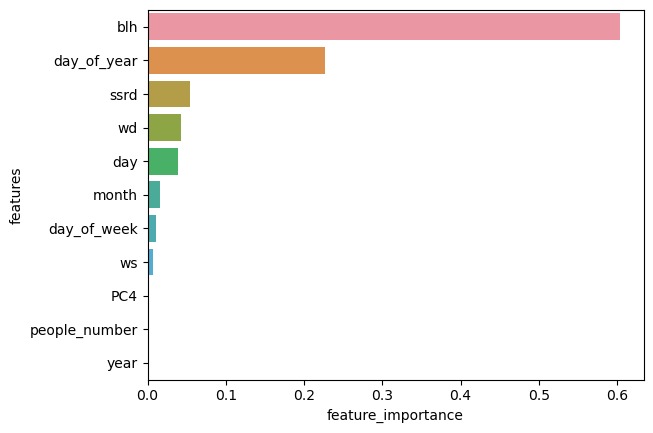

In [35]:
plot_features(X_train.columns, gbr_model.feature_importances_)

The columns which affected the model the most are boundary layer height, day of year, solar sun radiation, wind direction and day.

The model was unable to identify a pattern or correlation between the number of people and the PM2.5 due to the fact that during rush hours, both the number of people and the PM2.5 (pollution level) rise, and when people arrive at their destinations, the number of people stays very high while the pollution level declines.

Given that the zip codes are in the same city and have the same weather, it was likewise unable to establish a link between the zip code (PC4) and the PM2.5.

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor)</font></h4>

In [36]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_daily.pkl", "wb")) # wb = write binary

<h4><font color=mediumvioletred>Load the exported model and test it</font></h4>

In [37]:
loaded_model = pickle.load(open("models/gbr_air_quality_prediction_model_daily.pkl", "rb"))
show_scores(loaded_model)

{'Training MAE': 3.702118080860074, 'Testing MAE': 5.003318273816123}

**After modelling, we discussed the results with Georgiana Manolache and she advised us to group the data by week and also include a column to identify the season to see if the predictions can be improved any further.**

<h2><font color=slateblue>Modelling using weekly data</font></h2>

<h4><font color=mediumvioletred>Get sample of the dataframe</font></h4>

In [38]:
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
8321,5629,7477.0,6.640727,241.471362,2.631451,103.492339,336.340312,2021,9,10,4,253
772,5622,2362.0,13.485848,225.070228,3.404295,42.809242,426.715917,2021,1,24,6,24
3095,5628,3574.0,7.346822,169.993914,2.933185,114.922717,610.776848,2021,4,4,6,94
2303,5652,12357.0,6.408082,216.857766,9.368760,116.980718,1493.012566,2021,3,11,3,70
3148,5613,7003.0,4.446952,161.541647,5.089485,181.020853,935.249303,2021,4,6,1,96


<h4><font color=mediumvioletred>Add date column</font></h4>

In [39]:
df["date"] = df[df.columns[7:10]].apply(
    lambda x: "-".join(x.astype(str)), axis=1)

df["date"] = df["date"].astype("datetime64[ns]")

<h4><font color=mediumvioletred>Calculate week number from date</font></h4>

In [40]:
df['week_number'] = df['date'].dt.isocalendar().week

<h4><font color=mediumvioletred>Add season from date</font></h4>

1 = spring, 2 = summer, 3 = autumn, 4 = winter

In [41]:
date_offset = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

df['season'] = pd.cut(date_offset, [0, 300, 602, 900, 1300], 
                      labels=[1, 2, 3, 4])

<h4><font color=mediumvioletred>Get sample of the dataframe</font></h4>

In [42]:
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year,date,week_number,season
9485,5626,23545.0,10.351321,143.280173,3.297244,62.707332,604.884316,2021,10,15,4,288,2021-10-15,41,3
10132,5641,5681.0,19.277447,177.452414,1.959732,39.662359,111.123272,2021,11,4,3,308,2021-11-04,44,3
2627,5657,12728.0,9.237254,126.133999,4.463526,77.395619,766.571967,2021,3,21,6,80,2021-03-21,11,1
9469,5657,21374.0,15.954994,212.026864,4.633957,57.324625,575.252541,2021,10,14,3,287,2021-10-14,41,3
10142,5624,4426.0,18.086853,175.122821,1.949585,41.173173,115.868547,2021,11,4,3,308,2021-11-04,44,3


<h4><font color=mediumvioletred>Group the dataframe by area and week number</font></h4>

In [43]:
df_weekly = df.groupby(["PC4", "week_number"]).agg({"pm2.5": "mean", "wd": "mean", "ws": "mean", "ssrd": "mean", "blh": "mean", "people_number": "sum", "season": lambda x: x.iloc[1]}).reset_index()

<h4><font color=mediumvioletred>Get data for zip code 5615</font></h4>

In [44]:
df_weekly[df_weekly.PC4 == 5615][:20]

,PC4,week_number,pm2.5,wd,ws,ssrd,blh,people_number,season
188,5615,1,22.424890,123.330978,3.164777,21.008967,379.766082,28493.0,4
189,5615,2,18.903186,169.627734,3.944949,28.743293,514.425679,27307.0,4
190,5615,3,11.120214,226.768988,5.543433,31.394141,743.666952,30429.0,4
191,5615,4,18.344876,179.207799,4.210786,36.645872,509.488630,28045.0,4
192,5615,5,21.561596,176.674427,3.935283,27.183599,397.629005,27235.0,4
193,5615,6,19.029066,94.393184,3.925097,84.693781,418.111591,24106.0,4
194,5615,7,11.750731,259.523227,4.890734,71.262752,511.467894,28397.0,4
195,5615,8,12.148209,170.615613,3.362601,101.748600,443.092117,30787.0,4
196,5615,9,26.518792,115.733766,2.529431,114.709032,357.538443,35263.0,4
197,5615,10,16.075805,203.702675,5.696211,94.621430,935.631505,34303.0,4


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [45]:
X = df_weekly.drop("pm2.5", axis=1)
y = df_weekly["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [46]:
X.sample(5)

,PC4,week_number,wd,ws,ssrd,blh,people_number,season
112,5613,19,208.493452,2.531857,197.507933,610.659853,75305.0,1
393,5622,18,222.641090,4.779321,200.984137,900.176619,33747.0,1
1070,5644,37,160.066146,2.482079,136.854726,409.820374,106988.0,2
1417,5656,8,170.444955,3.367424,101.887749,444.703472,126244.0,4
65,5612,19,207.823632,2.526364,197.393452,608.487900,135092.0,1


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [47]:
y.sample(5)

1460    17.582236
660     11.058645
933     11.187904
827      4.808475
1399    13.577656
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [48]:
df_weekly.shape

(1551, 9)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [49]:
df_train = df_weekly[df_weekly.week_number < 38]
df_test = df_weekly[df_weekly.week_number >= 38]

len(df_train), len(df_test)

(1221, 330)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [50]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1221, 8), (1221,), (330, 8), (330,))

<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [51]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
# score model
show_scores(rf_model)

{'Training MAE': 0.024578897184108037, 'Testing MAE': 6.072975797769486}

In [53]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
45,34.319192,14.292401,20.026791
327,34.319192,14.289023,20.030169
186,34.319192,14.289023,20.030169
233,34.319192,14.289023,20.030169
280,34.319192,14.289023,20.030169
139,34.319192,14.289023,20.030169
1173,34.355470,14.269965,20.085505
1455,34.680089,14.342753,20.337337
1361,34.680089,14.337298,20.342791
1079,34.680089,14.274116,20.405973


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [54]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [55]:
# score model
show_scores(sgd_model)

{'Training MAE': 4.228876435507023, 'Testing MAE': 8.53119431230069}

In [56]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
327,34.319192,11,23.319192
280,34.319192,11,23.319192
92,34.319192,11,23.319192
139,34.319192,11,23.319192
186,34.319192,11,23.319192
233,34.319192,11,23.319192
1173,34.355470,11,23.355470
1079,34.680089,11,23.680089
1361,34.680089,11,23.680089
1455,34.680089,11,23.680089


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [57]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [58]:
# score model
show_scores(gbr_model)

{'Training MAE': 1.1943743662594815, 'Testing MAE': 7.398151531788652}

In [59]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
186,34.319192,15.462908,18.856284
45,34.319192,15.462908,18.856284
280,34.319192,15.462908,18.856284
139,34.319192,15.462908,18.856284
327,34.319192,15.462908,18.856284
233,34.319192,15.462908,18.856284
1173,34.355470,15.462908,18.892562
1079,34.680089,15.462908,19.217181
1455,34.680089,15.462908,19.217181
1361,34.680089,15.462908,19.217181


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [60]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [61]:
# score model
show_scores(br_model)

{'Training MAE': 2.3344465343406453, 'Testing MAE': 8.503177539345117}

In [62]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
233,34.319192,10.724954,23.594238
280,34.319192,10.724078,23.595114
186,34.319192,10.709456,23.609736
327,34.319192,10.704694,23.614498
139,34.319192,10.677221,23.641971
45,34.319192,10.661235,23.657957
92,34.319192,10.625715,23.693477
1361,34.680089,10.880571,23.799518
1079,34.680089,10.765126,23.914963
1455,34.680089,10.669848,24.010241


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [63]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [64]:
# score model
show_scores(lasso_model)

{'Training MAE': 2.3416797240304987, 'Testing MAE': 8.602986638895269}

In [65]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
280,34.319192,10.425495,23.893697
233,34.319192,10.425011,23.894181
186,34.319192,10.409504,23.909688
327,34.319192,10.407024,23.912168
139,34.319192,10.379159,23.940033
45,34.319192,10.365094,23.954098
92,34.319192,10.331649,23.987543
1361,34.680089,10.563518,24.116571
1079,34.680089,10.453654,24.226435
1455,34.680089,10.359558,24.320532


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [66]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [67]:
# score model
show_scores(en_model)

{'Training MAE': 2.422679766416977, 'Testing MAE': 8.626299350617332}

In [68]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
233,34.319192,10.069607,24.249585
186,34.319192,10.054422,24.264770
327,34.319192,10.051926,24.267266
1173,34.355470,10.063046,24.292424
139,34.319192,10.026660,24.292532
45,34.319192,10.016471,24.302721
92,34.319192,9.983285,24.335907
1361,34.680089,10.144288,24.535801
1079,34.680089,10.046733,24.633356
1455,34.680089,9.932617,24.747472


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [69]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [70]:
# score model
show_scores(svr_model)

{'Training MAE': 3.913479596322271, 'Testing MAE': 7.805045466821868}

In [71]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
186,34.319192,11.374957,22.944235
609,32.812274,9.789342,23.022932
139,34.319192,10.966573,23.352619
1220,32.812274,9.420553,23.391721
1173,34.355470,10.868781,23.486689
1267,33.525037,9.902843,23.622194
45,34.319192,10.689036,23.630156
92,34.319192,10.260789,24.058403
1079,34.680089,10.477429,24.202660
1455,34.680089,9.298868,25.381221


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* RandomForestRegressor: 6.0729757977694865
* GradientBoostingRegressor: 7.398151531788652
* SVR: 7.805045466821868

**After using more data (from 2021-01-01 to 2021-11-18) and grouping the data by week, the models' scores improved a bit.
However, the maximum value is still too high, this is because there are unhandled outliers.**

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

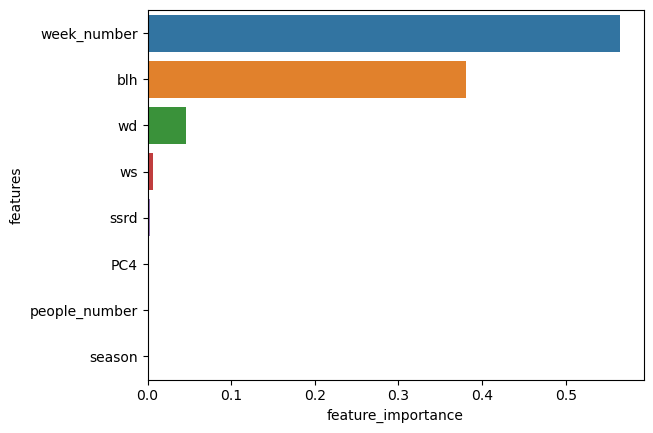

In [72]:
# GradientBoostingRegressor model
plot_features(X_train.columns, gbr_model.feature_importances_)

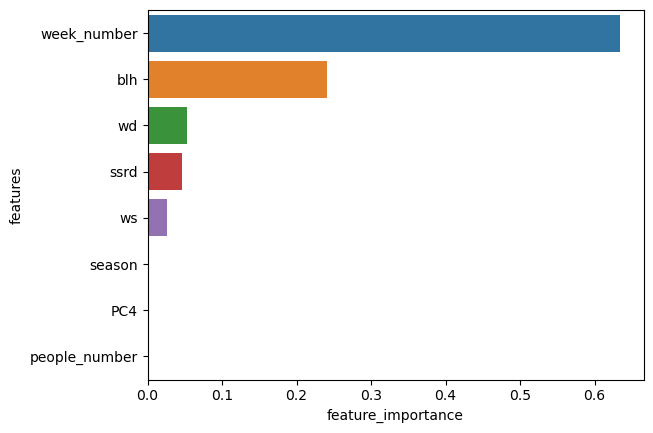

In [73]:
# RandomForestRegressor model
plot_features(X_train.columns, rf_model.feature_importances_)

The columns which affected the best models the most are week number, boundary layer height, wind direction, solar sun radiation and wind speed.

The model was unable to identify a pattern or correlation between the number of people and the PM2.5 due to the fact that during rush hours, both the number of people and the PM2.5 pollution level rise, and when people arrive at their destinations, the number of people stays very high while the pollution level declines.

Given that the zip codes are in the same city and have the same weather, it was likewise unable to establish a link between the zip code (PC4) and the PM2.5.

Including the season column had no effect on the model.

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor and RandomForestRegressor)</font></h4>

In [74]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_weekly.pkl", "wb")) # wb = write binary
pickle.dump(gbr_model, open("models/rf_air_quality_prediction_model_weekly.pkl", "wb")) # wb = write binary